In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from keras.layers import LSTM
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout
from keras.utils import to_categorical
import tensorflow as tf

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/IA/sensor.csv")
#data=pd.read_csv("Desktop/Fackiu/OPTATIVAS/IA/2P/archive/sensor.csv")

In [ ]:
(data.isna().sum()/220320)*100

Unnamed: 0          0.000000
timestamp           0.000000
sensor_00           4.633261
sensor_01           0.167484
sensor_02           0.008624
sensor_03           0.008624
sensor_04           0.008624
sensor_05           0.008624
sensor_06           2.177741
sensor_07           2.474129
sensor_08           2.317992
sensor_09           2.085603
sensor_10           0.008624
sensor_11           0.008624
sensor_12           0.008624
sensor_13           0.008624
sensor_14           0.009532
sensor_15         100.000000
sensor_16           0.014070
sensor_17           0.020879
sensor_18           0.020879
sensor_19           0.007262
sensor_20           0.007262
sensor_21           0.007262
sensor_22           0.018609
sensor_23           0.007262
sensor_24           0.007262
sensor_25           0.016340
sensor_26           0.009078
sensor_27           0.007262
sensor_28           0.007262
sensor_29           0.032680
sensor_30           0.118464
sensor_31           0.007262
sensor_32     

In [ ]:
data['sensor_51'][110000:140000]= data['sensor_50'][110000:140000]
data.drop(labels=['sensor_15','sensor_50','sensor_00'],axis=1,inplace=True)
data.fillna(method='pad',limit=15,inplace=True)
print((data.isna().sum()/220320)*100)
print(data.isna().sum().sum())
print(data.shape)

<ipython-input-5-9c48339e20af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sensor_51'][110000:140000]= data['sensor_50'][110000:140000]


Unnamed: 0        0.000000
timestamp         0.000000
sensor_01         0.108932
sensor_02         0.000000
sensor_03         0.000000
sensor_04         0.000000
sensor_05         0.000000
sensor_06         2.141885
sensor_07         2.443718
sensor_08         2.288943
sensor_09         2.052469
sensor_10         0.000000
sensor_11         0.000000
sensor_12         0.000000
sensor_13         0.000000
sensor_14         0.000000
sensor_16         0.000000
sensor_17         0.000000
sensor_18         0.000000
sensor_19         0.000000
sensor_20         0.000000
sensor_21         0.000000
sensor_22         0.000000
sensor_23         0.000000
sensor_24         0.000000
sensor_25         0.000000
sensor_26         0.000000
sensor_27         0.000000
sensor_28         0.000000
sensor_29         0.011801
sensor_30         0.101670
sensor_31         0.000000
sensor_32         0.009078
sensor_33         0.000000
sensor_34         0.000000
sensor_35         0.000000
sensor_36         0.000000
s

In [ ]:
data['machine_status'].value_counts()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

In [ ]:
    le = preprocessing.LabelEncoder()
    le.fit(data['machine_status'])
    data['target'] = pd.DataFrame(le.transform(data['machine_status']),columns=['target'])
    data["encoded_target"] = data['machine_status'].apply(lambda x: 1 if (x=='BROKEN' or x=='RECOVERING') else 0)

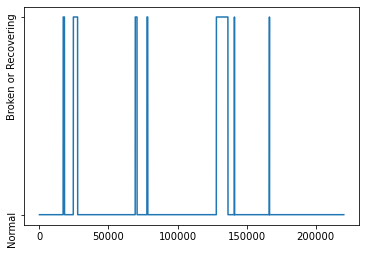

In [ ]:
    x=np.linspace(1,data.shape[0],data.shape[0])
    plt.plot(x,data['encoded_target'])
    labels = ['Normal','Broken or Recovering']
    plt.yticks([0, 1], labels, rotation='vertical')
    plt.show()

In [ ]:
data['encoded_target'].value_counts()

0    205836
1     14484
Name: encoded_target, dtype: int64

In [ ]:

data.dropna(inplace=True)
print(data.shape)

(213845, 54)


In [ ]:
data.columns

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


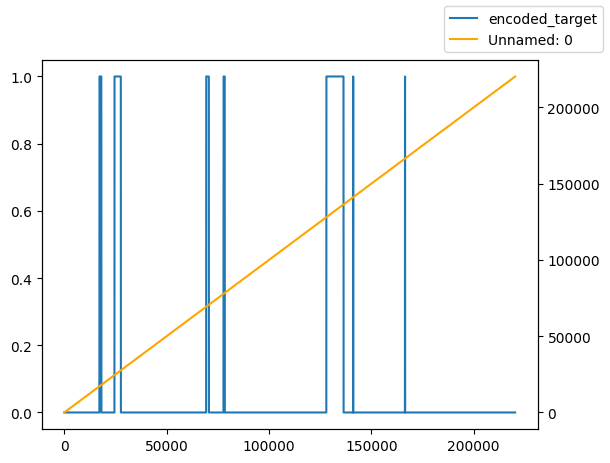

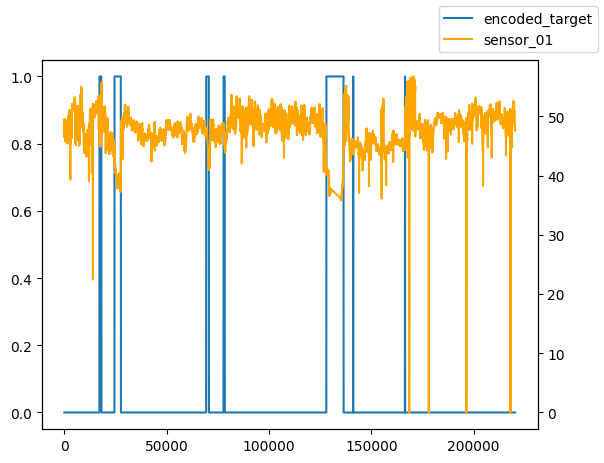

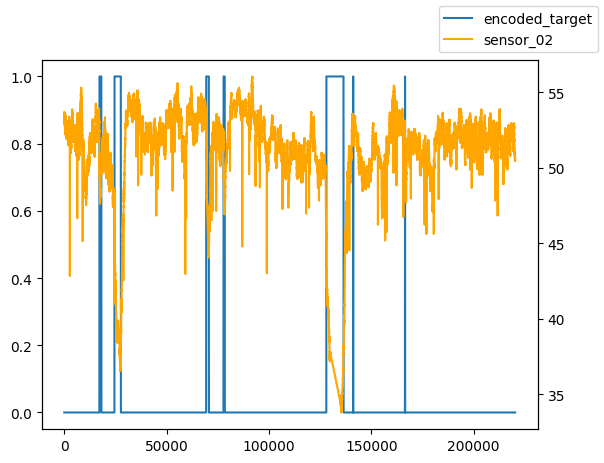

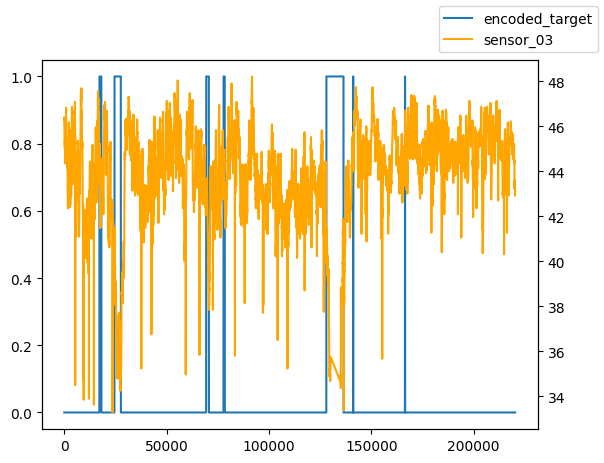

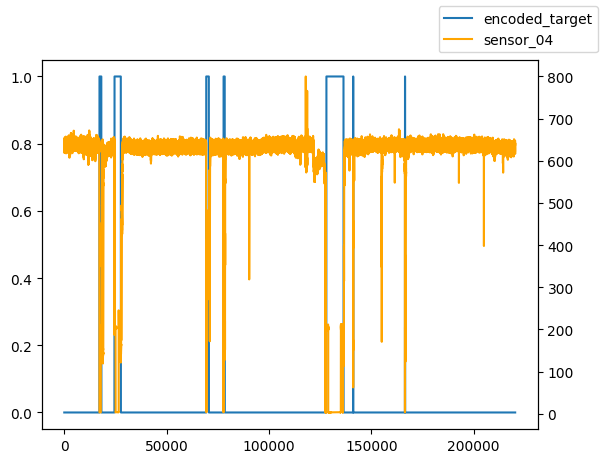

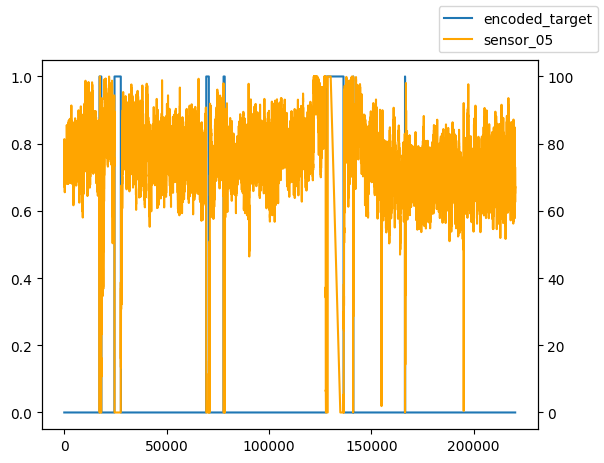

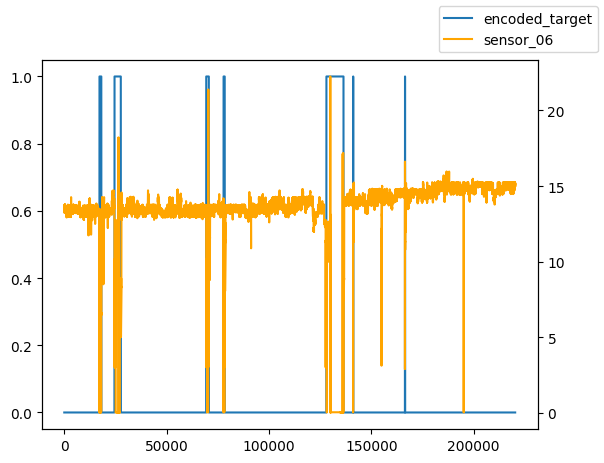

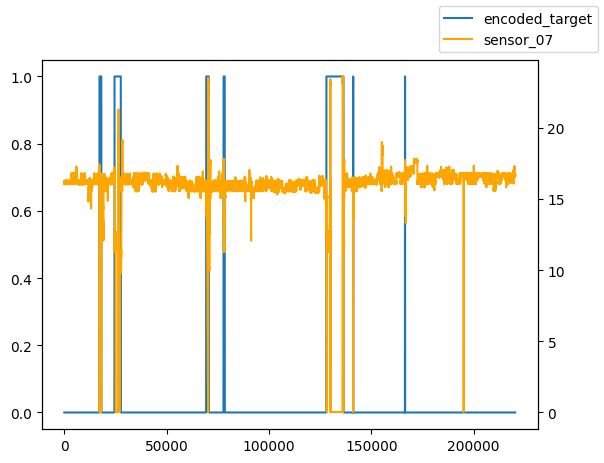

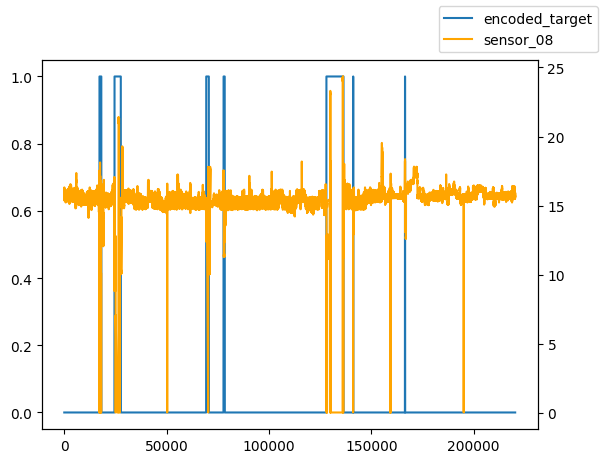

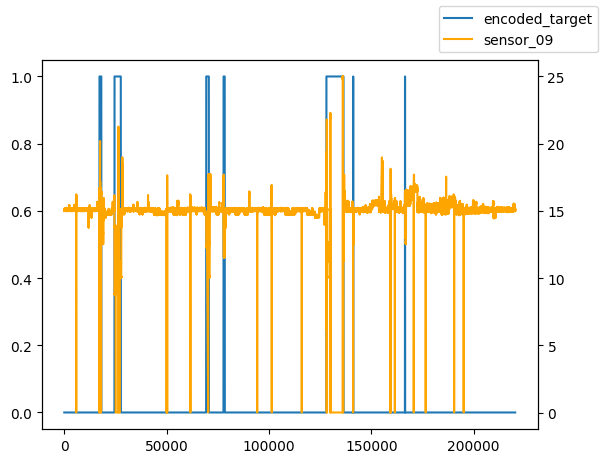

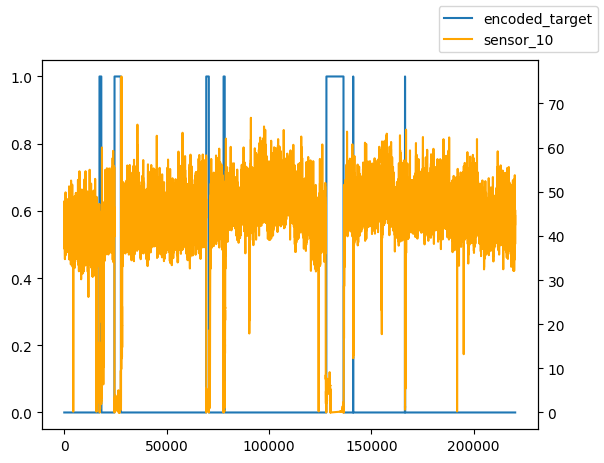

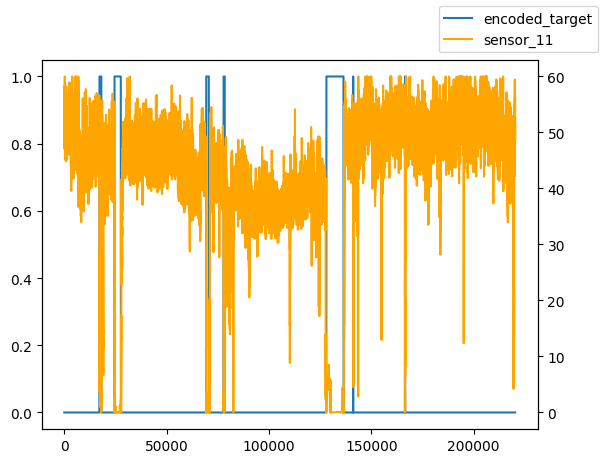

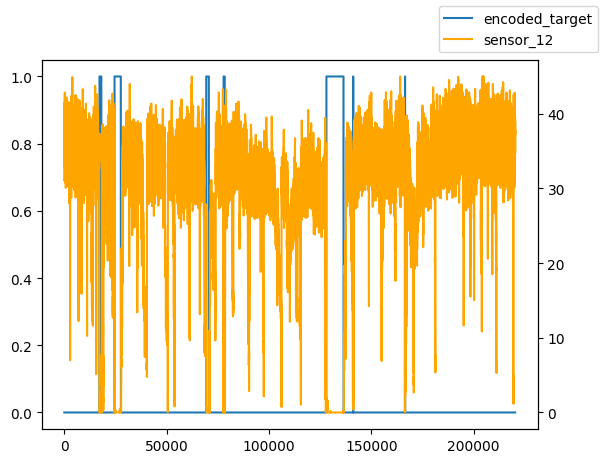

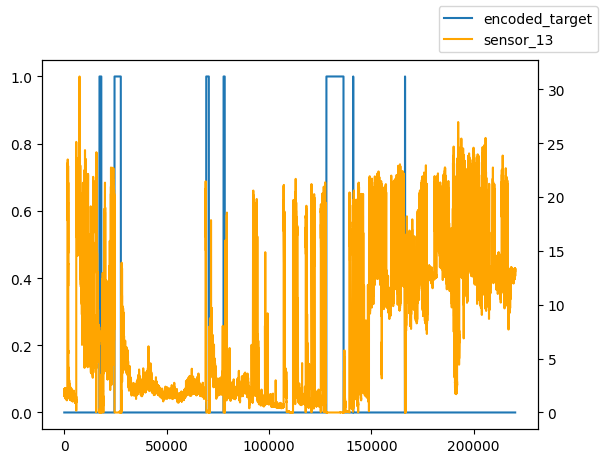

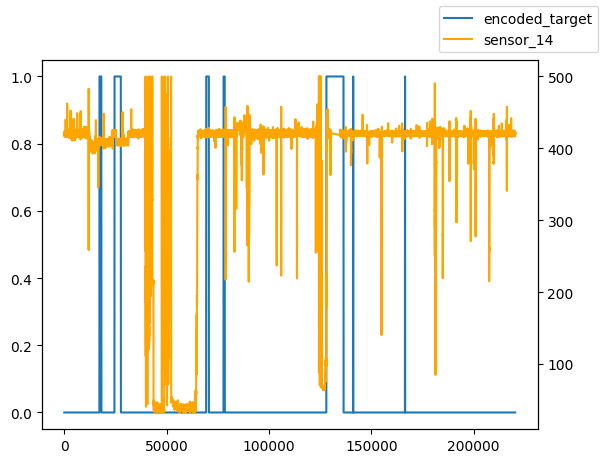

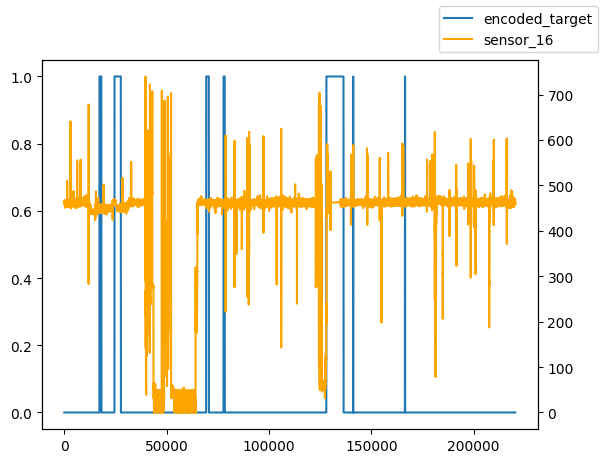

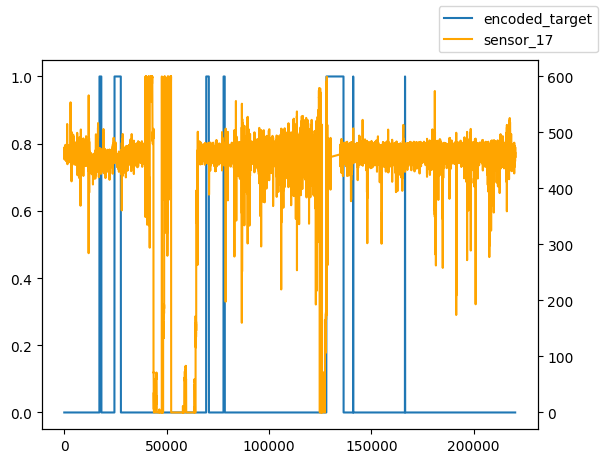

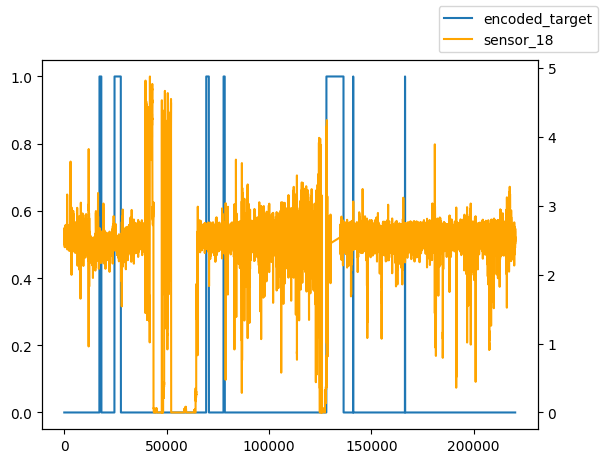

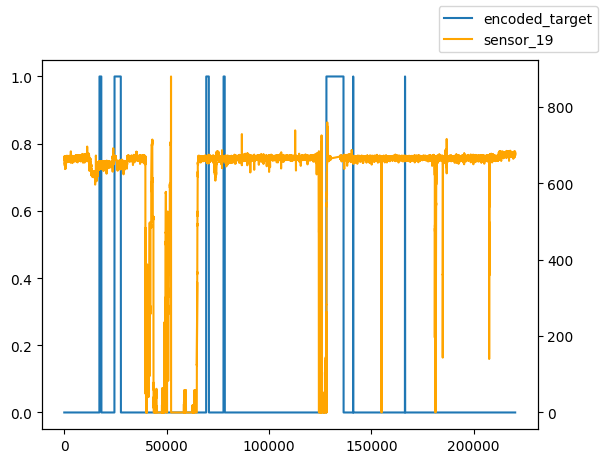

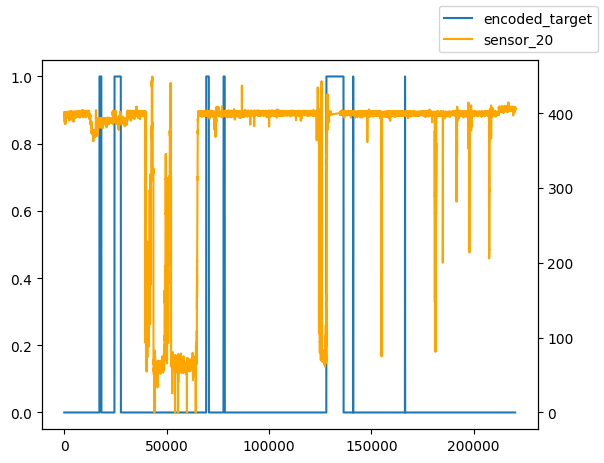

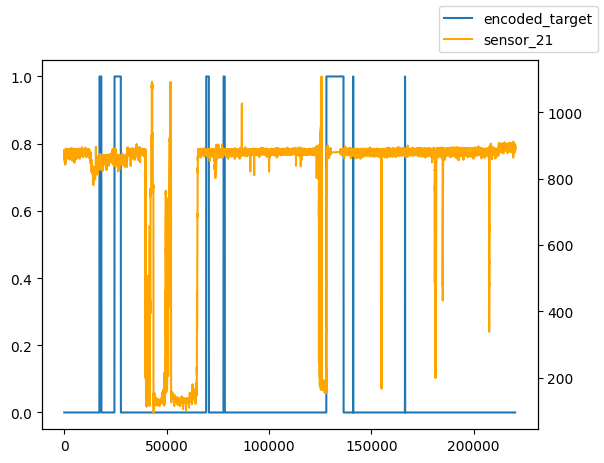

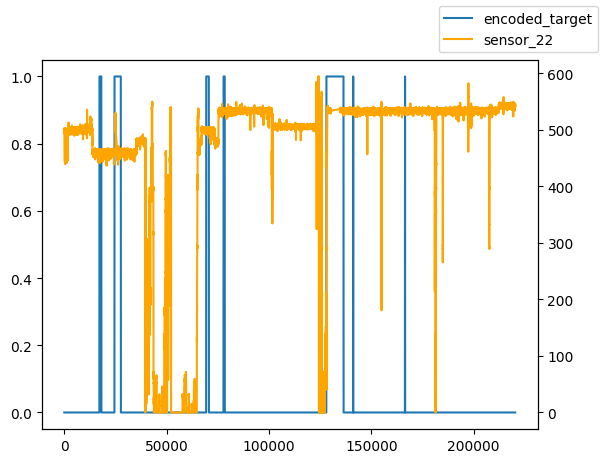

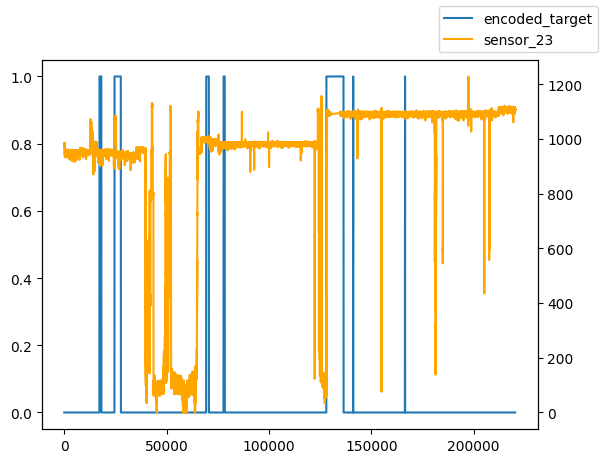

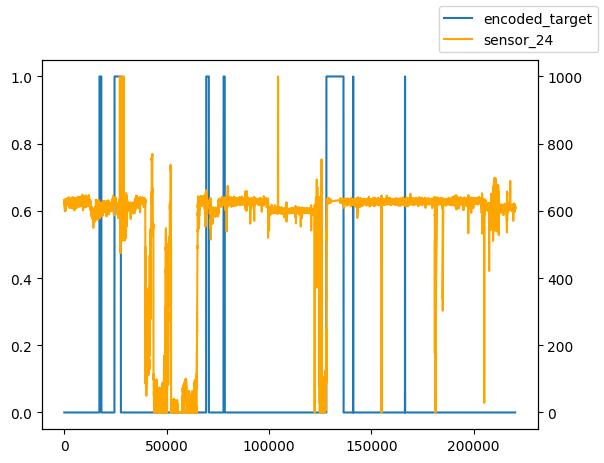

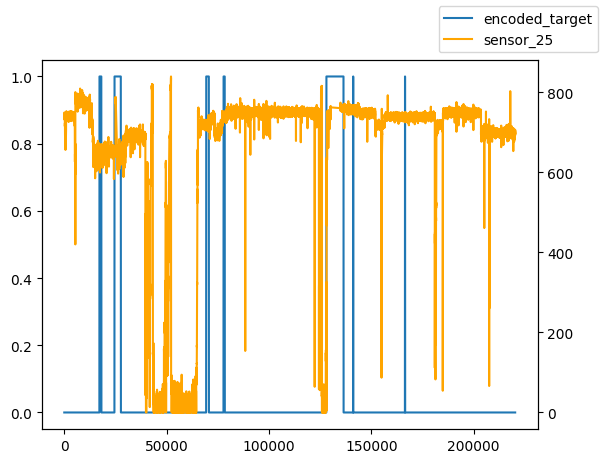

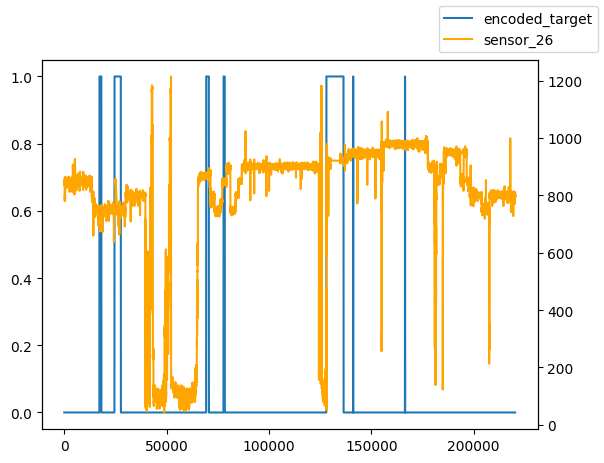

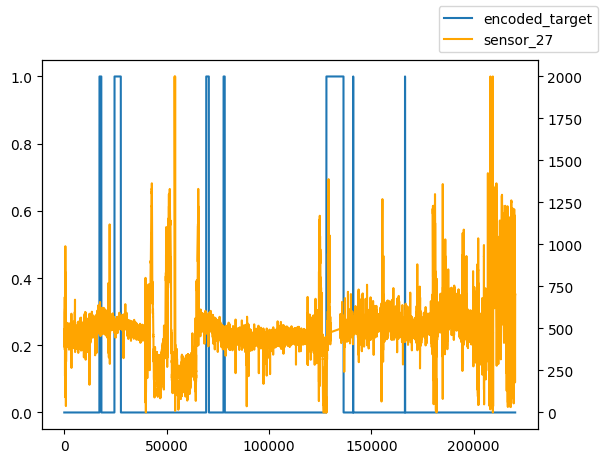

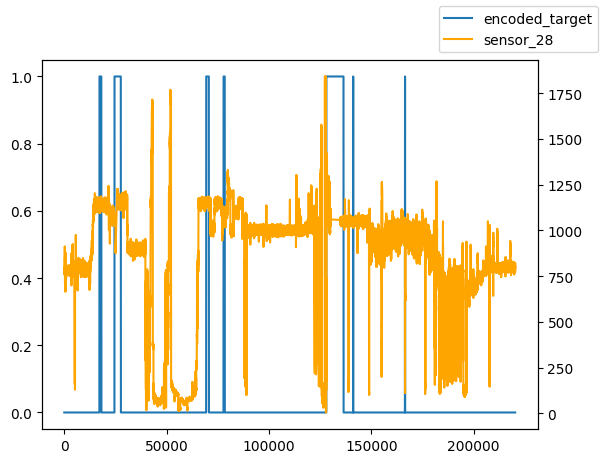

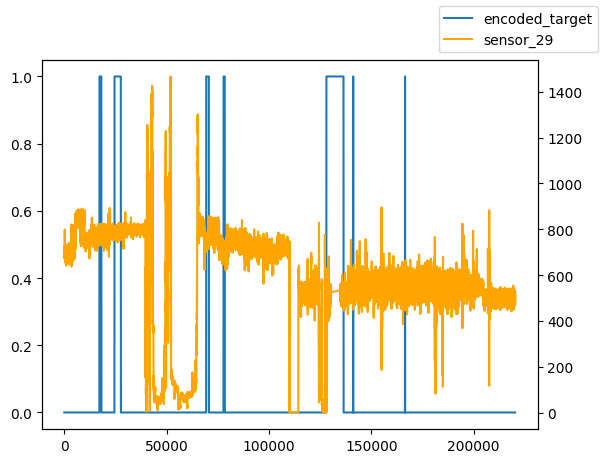

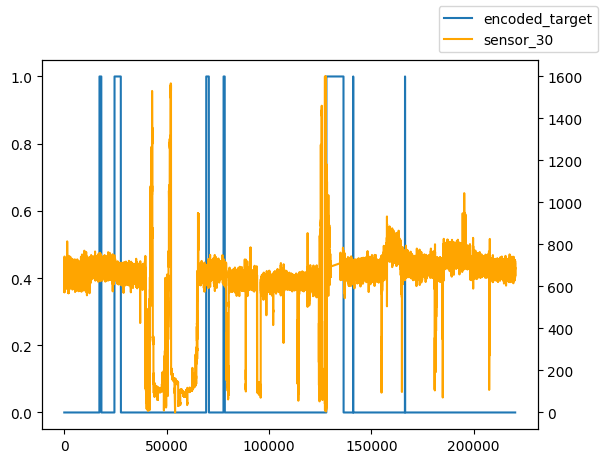

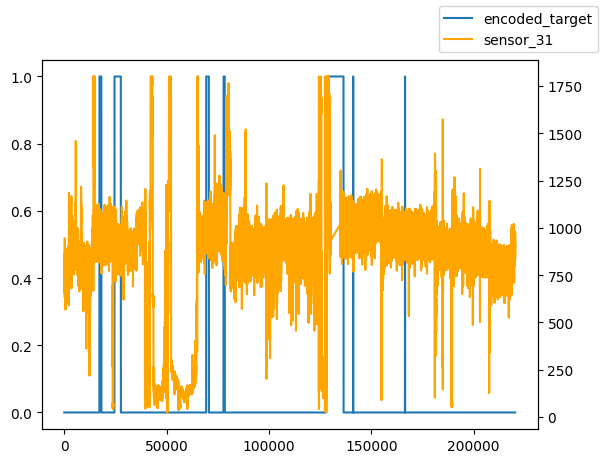

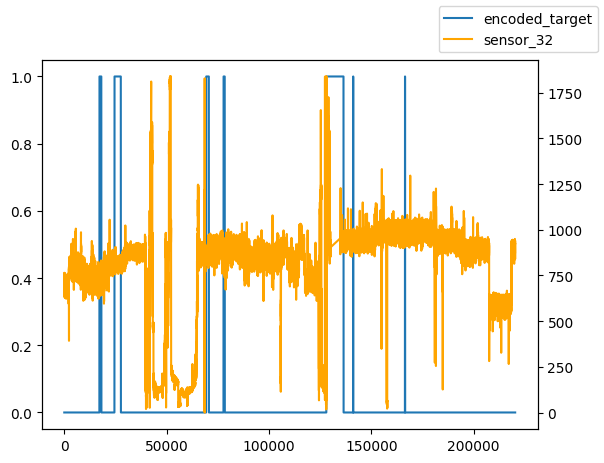

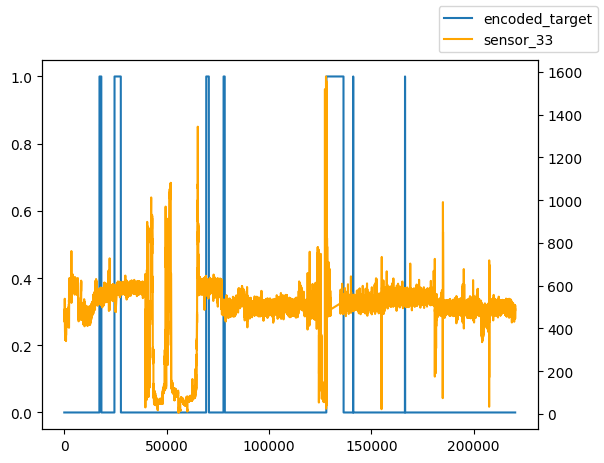

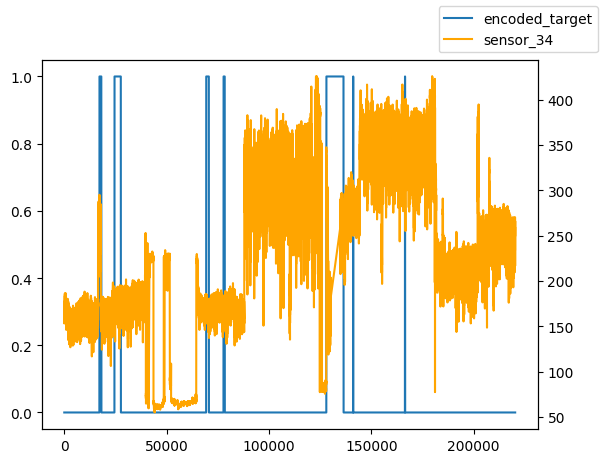

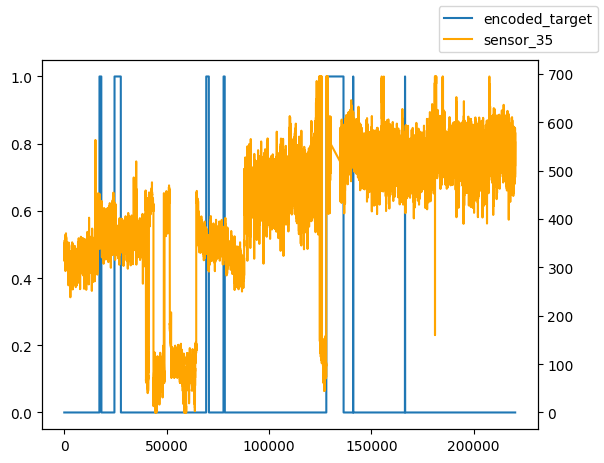

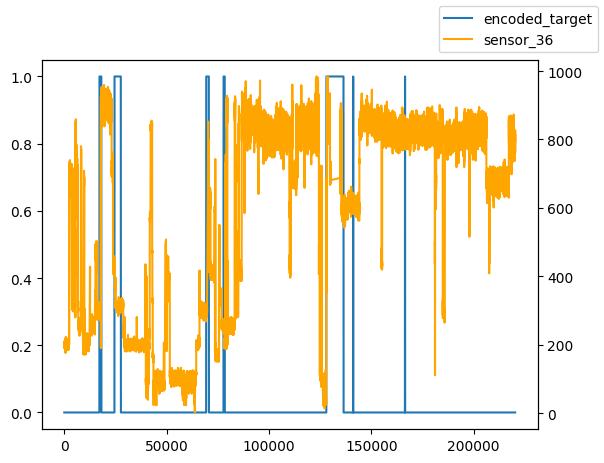

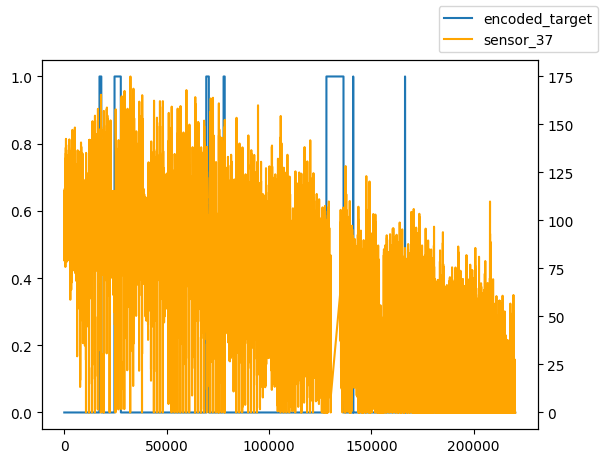

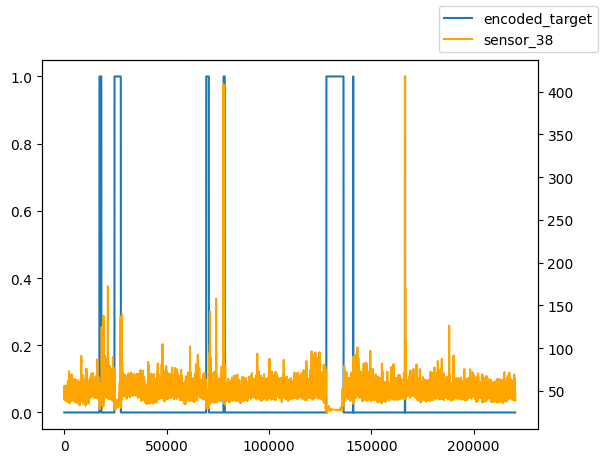

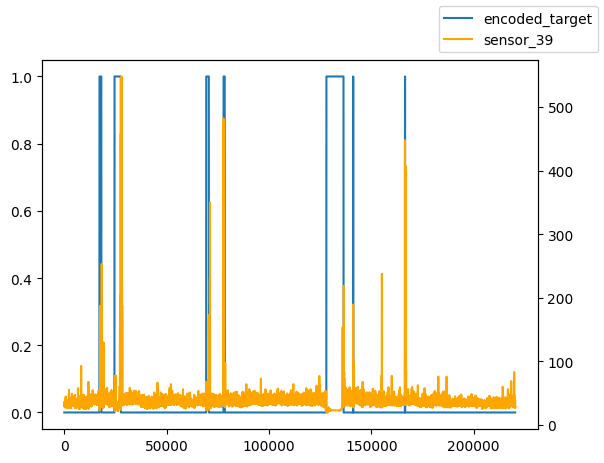

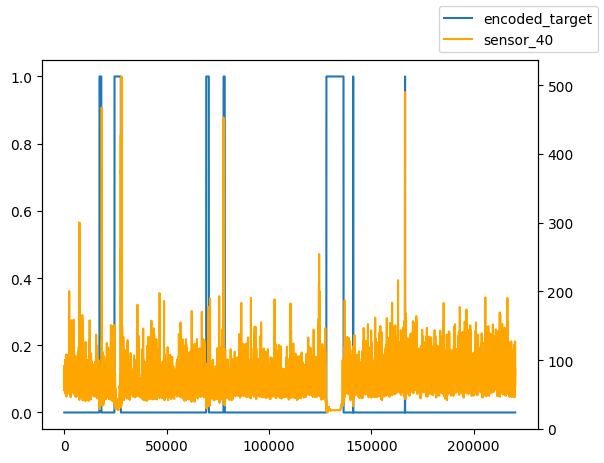

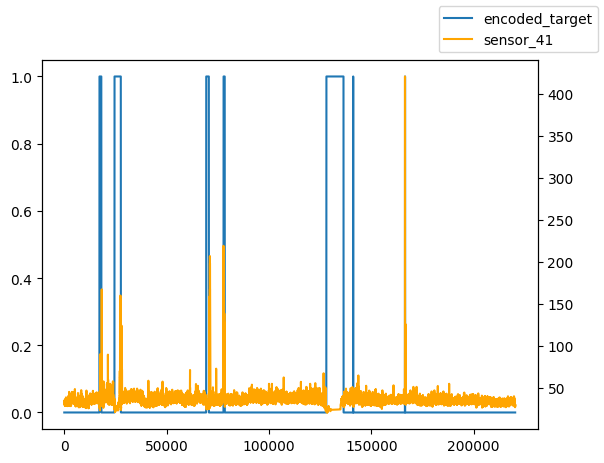

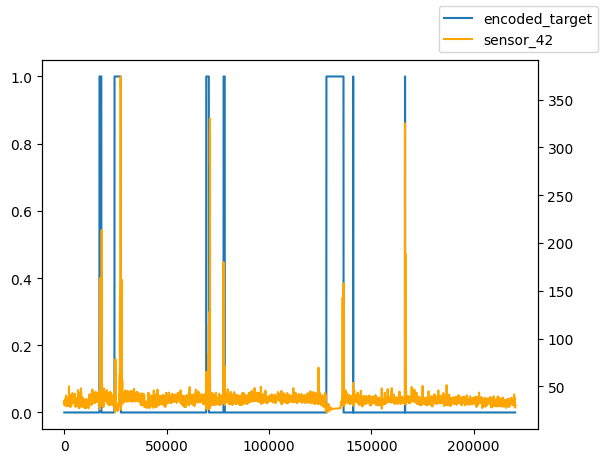

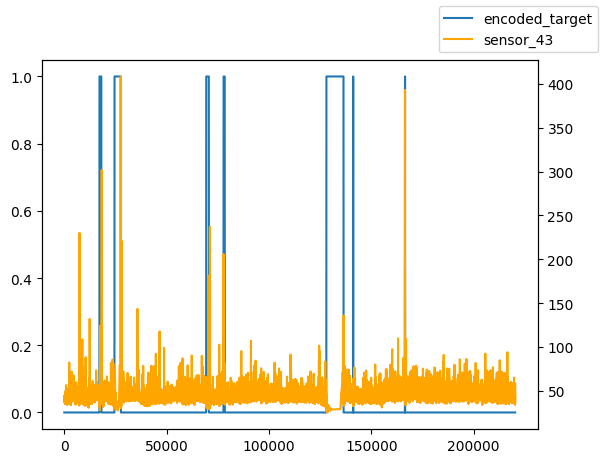

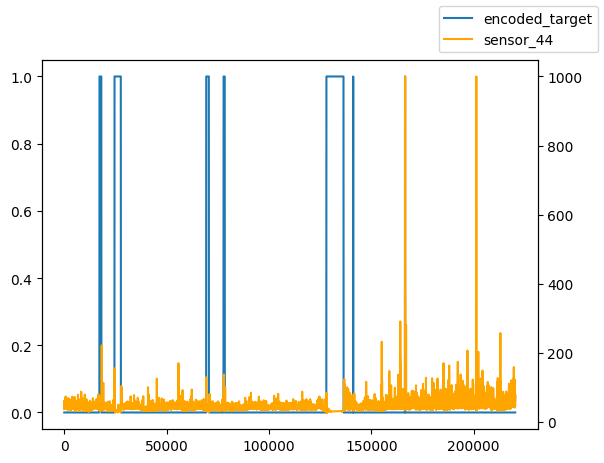

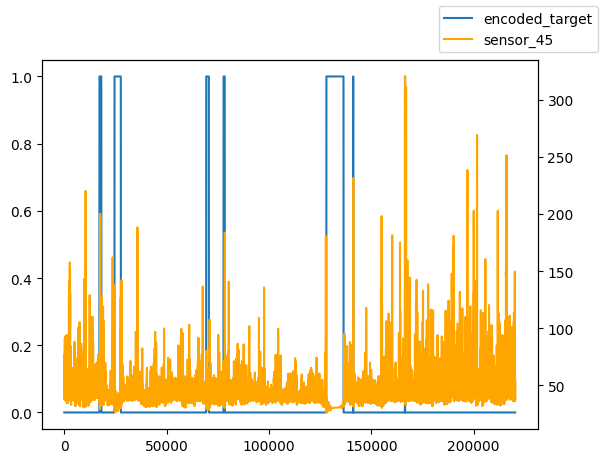

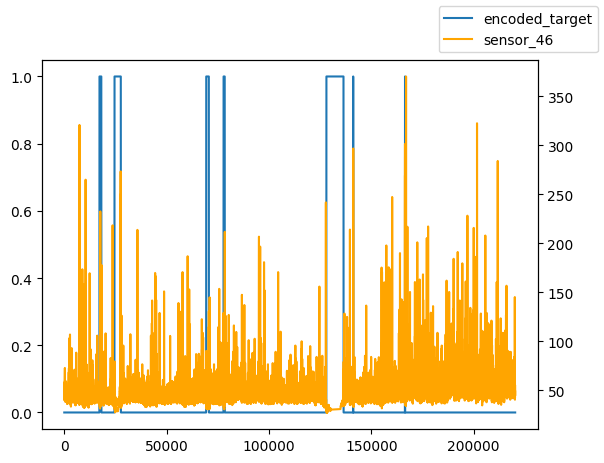

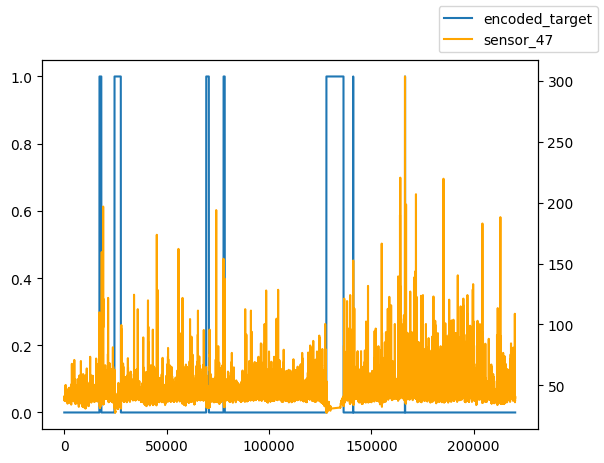

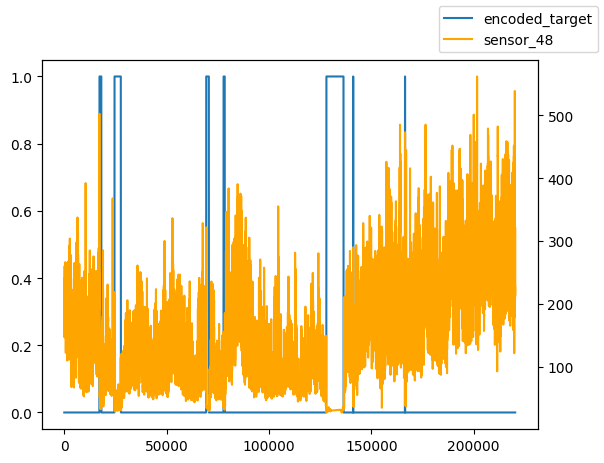

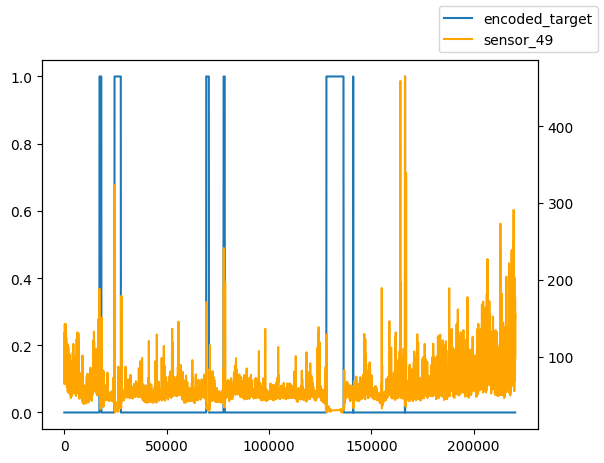

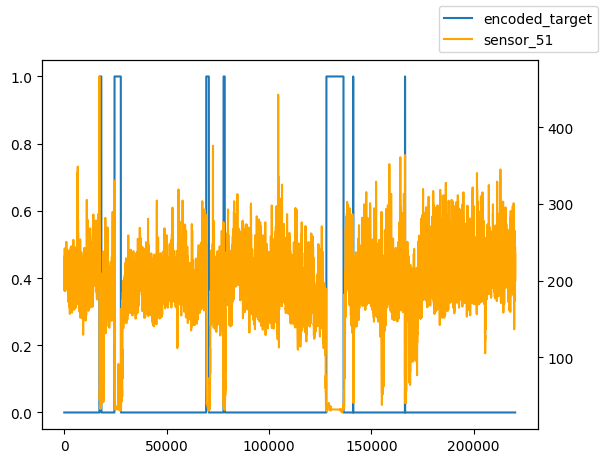

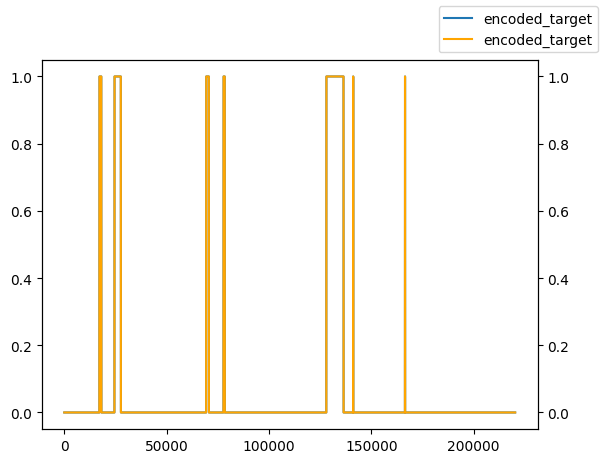

In [ ]:
data_plot = data.drop(labels=['timestamp','machine_status','target'],axis=1)
for column in data_plot.columns:
  ax = data.plot(y = "encoded_target",legend = False)
  ax2 = ax.twinx()
  ax2.plot(data_plot[column],color = "orange",label=column)
  ax.figure.legend()

In [ ]:
df_train = data.drop(labels=['Unnamed: 0','timestamp','machine_status','target'],axis=1)

<Axes: >

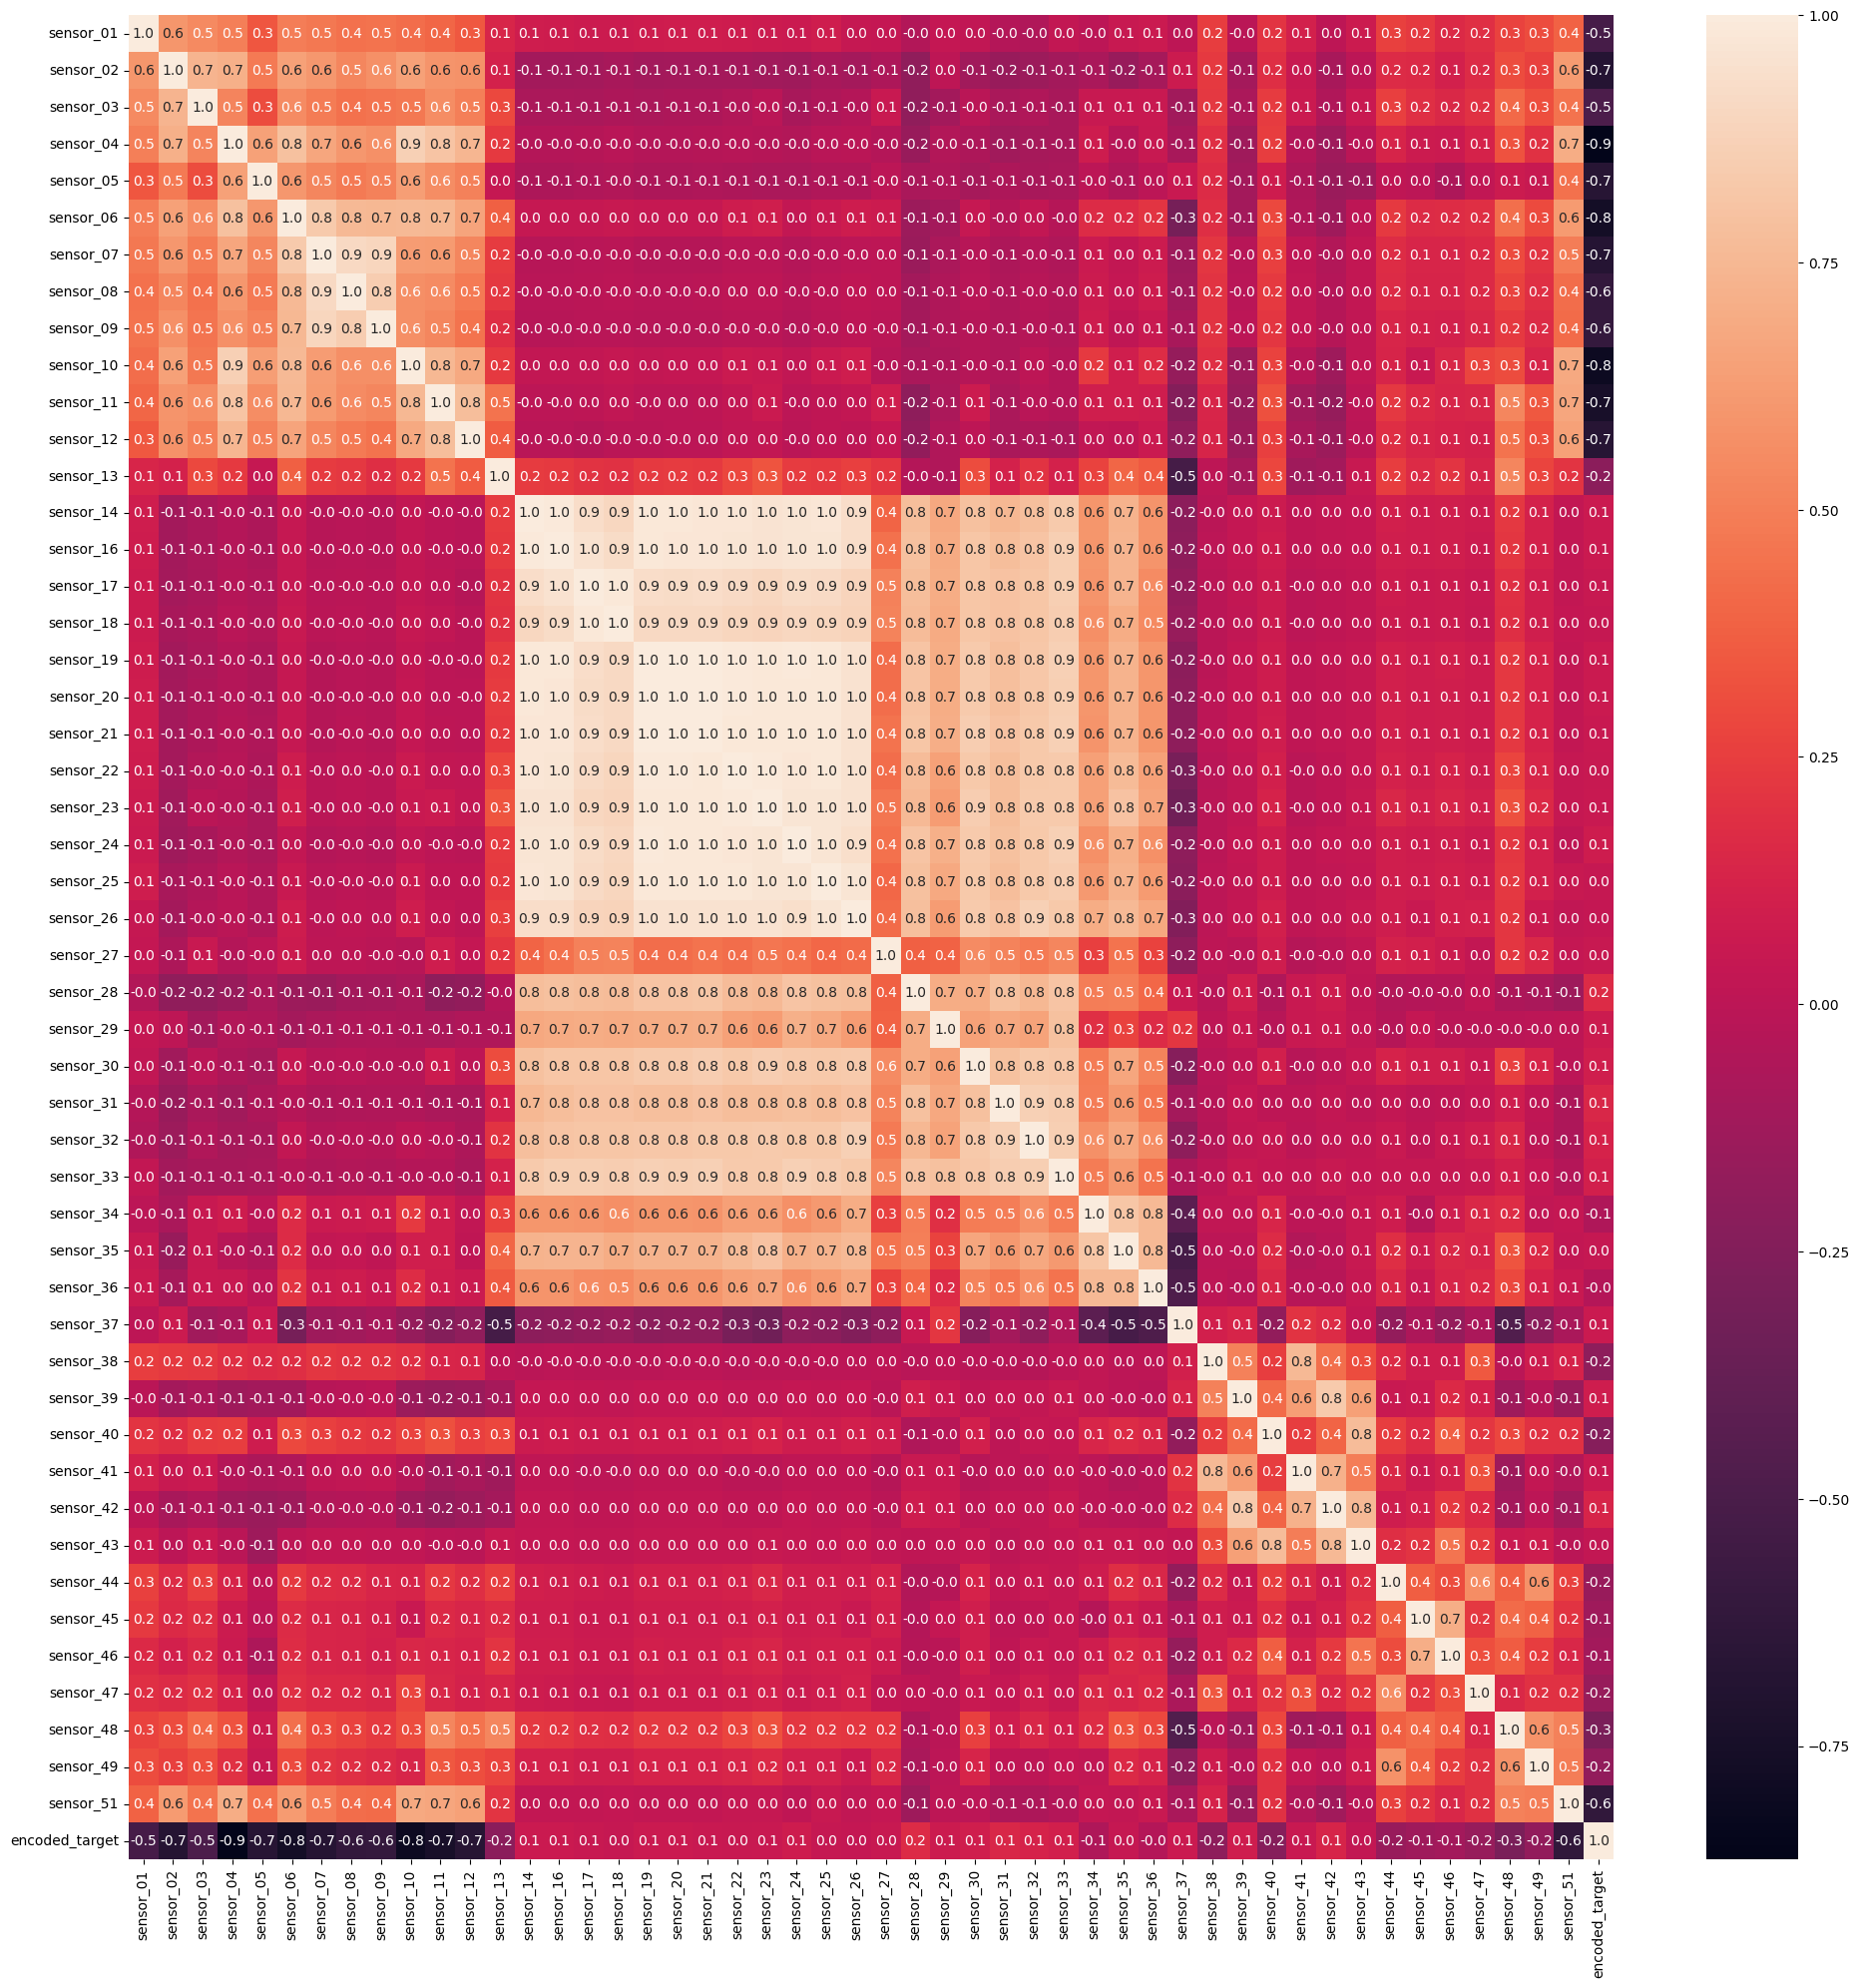

In [ ]:
correlation_matrix = df_train.corr()
plt.figure(figsize=(24,24))
sns.heatmap(correlation_matrix,annot=True,fmt='.1f')


In [ ]:
selected_features_corr = correlation_matrix[abs(correlation_matrix['encoded_target']) >=0.5].index
print(selected_features_corr)

Index(['sensor_01', 'sensor_02', 'sensor_04', 'sensor_05', 'sensor_06',
       'sensor_07', 'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11',
       'sensor_12', 'sensor_51', 'encoded_target'],
      dtype='object')


In [ ]:
dt = DecisionTreeClassifier(random_state=10, criterion = 'entropy', max_depth = 10)
dt.fit(df_train.drop('encoded_target',axis=1),df_train['encoded_target'])
fi_col = []
fi = []
selected_features_dt = []
for i,column in enumerate(df_train.drop('encoded_target',axis=1)):
    print('{}: {}'.format(column, dt.feature_importances_[i]))
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])
    if (dt.feature_importances_[i] >= 0.01):
      selected_features_dt.append(column)


sensor_01: 0.023366803880112023
sensor_02: 0.0067417440800985155
sensor_03: 0.0034983766739820864
sensor_04: 0.03778248756331634
sensor_05: 0.036419922943437655
sensor_06: 0.0031446775049144625
sensor_07: 0.0
sensor_08: 0.0
sensor_09: 0.0
sensor_10: 0.8495799548858449
sensor_11: 0.0
sensor_12: 0.0009685045883058828
sensor_13: 0.00021698153844775393
sensor_14: 0.0
sensor_16: 0.0
sensor_17: 0.0
sensor_18: 0.0
sensor_19: 0.0
sensor_20: 0.0
sensor_21: 0.0
sensor_22: 0.0
sensor_23: 0.0
sensor_24: 0.0
sensor_25: 0.0
sensor_26: 0.003793832284605348
sensor_27: 0.011161518647152037
sensor_28: 0.0
sensor_29: 0.0
sensor_30: 0.00013278578964620846
sensor_31: 0.0
sensor_32: 0.0
sensor_33: 0.0
sensor_34: 0.011145897284044162
sensor_35: 0.0
sensor_36: 0.0
sensor_37: 0.0
sensor_38: 0.0007769128349186672
sensor_39: 0.0009892081605631464
sensor_40: 0.000597987631499442
sensor_41: 0.0
sensor_42: 0.00034745899617453824
sensor_43: 0.0
sensor_44: 0.0009541881424671514
sensor_45: 0.0005406127312015427
sensor

In [ ]:
selected_features_dt = pd.Index(selected_features_dt)

In [ ]:
selected_features = selected_features_corr.union(selected_features_dt)
print(selected_features)

Index(['encoded_target', 'sensor_01', 'sensor_02', 'sensor_04', 'sensor_05',
       'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09', 'sensor_10',
       'sensor_11', 'sensor_12', 'sensor_27', 'sensor_34', 'sensor_51'],
      dtype='object')


In [ ]:
df = df_train.loc[:,selected_features]

In [ ]:
scaler = MinMaxScaler().fit(df)
df_scaled = scaler.transform(df)

In [ ]:
X = []
y = []

n_future = 1
n_past = 10

for i in range(n_past,len(df_scaled)-n_future+1):
  X.append(df_scaled[i-n_past:i,1:df_train.shape[1]+1])
  y.append(df_scaled[i+n_future-1:i+n_future,0])

X, y = np.array(X),np.array(y)


In [ ]:
print(X.shape, y.shape)

(213835, 10, 14) (213835, 1)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import tensorflow as tf

config = tf.compat.v1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.9
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

In [ ]:
model = Sequential()
model.add(LSTM(32,activation='relu',input_shape=(X_train.shape[1],X_train.shape[2]),return_sequences=True))
model.add(LSTM(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['Precision', 'Recall'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 10, 32)            6016      
                                                                 
 lstm_5 (LSTM)               (None, 16)                3136      
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 9,169
Trainable params: 9,169
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train,y_train,epochs=50,batch_size=64, shuffle=False)

Epoch 1/50
2673/2673 [==============================] - 262s 89ms/step - loss: 0.0169 - precision: 0.9154 - recall: 0.9556
Epoch 2/50
2673/2673 [==============================] - 241s 90ms/step - loss: 0.0067 - precision: 0.9618 - recall: 0.9856
Epoch 3/50
2673/2673 [==============================] - 237s 89ms/step - loss: 0.0059 - precision: 0.9637 - recall: 0.9866
Epoch 4/50
2673/2673 [==============================] - 246s 92ms/step - loss: 0.0052 - precision: 0.9664 - recall: 0.9888
Epoch 5/50
2673/2673 [==============================] - 265s 99ms/step - loss: 0.0045 - precision: 0.9675 - recall: 0.9885
Epoch 6/50
2673/2673 [==============================] - 297s 111ms/step - loss: 0.0040 - precision: 0.9700 - recall: 0.9892
Epoch 7/50
2673/2673 [==============================] - 259s 97ms/step - loss: 0.0035 - precision: 0.9764 - recall: 0.9875
Epoch 8/50
2673/2673 [==============================] - 257s 96ms/step - loss: 0.0028 - precision: 0.9885 - recall: 0.9878
Epoch 9/50
2673

In [ ]:
model.save('model.keras')

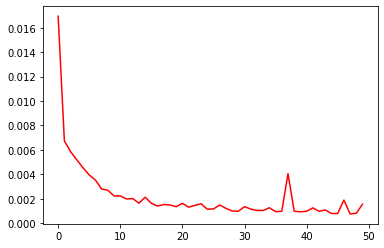

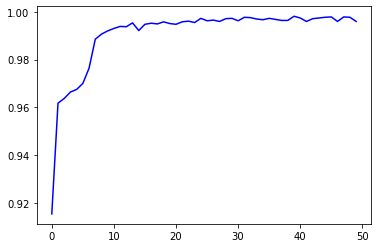

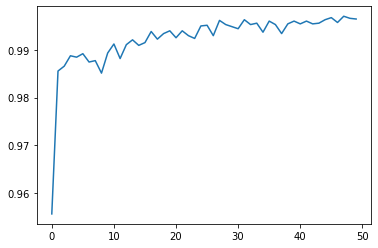

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'],'r')
plt.show()
plt.plot(history.history['precision'],'b')
plt.show()
plt.plot(history.history['recall'])
plt.show()

In [ ]:
new_model = tf.keras.models.load_model('model.keras')


In [ ]:
new_model.evaluate(X_test,y_test)

1337/1337 [==============================] - 62s 34ms/step - loss: 8.7984e-04 - precision: 0.9963 - recall: 0.9945


[0.0008798385388217866, 0.9963481426239014, 0.9945322275161743]

In [ ]:
y_target = data['encoded_target'].values
y_prueba = y_target[120000:140000]
x_prueba = X[120000:140000]




In [ ]:
y_prueba_test = new_model.predict(x_prueba)

625/625 [==============================] - 35s 32ms/step


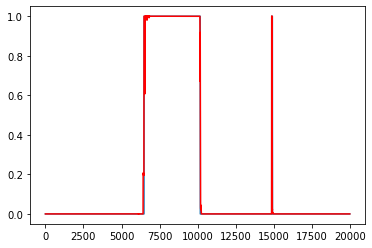

In [ ]:
plt.plot(y_prueba)
plt.plot(y_prueba_test,'r')
plt.show()


Segundo Modelo

In [ ]:
X2 = []
y2 = []

n_future = 1
n_past = 30

for i in range(n_past,len(df_scaled)-n_future+1):
  X2.append(df_scaled[i-n_past:i,1:df_train.shape[1]+1])
  y2.append(df_scaled[i+n_future-1:i+n_future,0])

X2, y2 = np.array(X2),np.array(y2)

In [ ]:
X_train2=X2[0:120000]
y_train2=y2[0:120000]

X_val2=X2[140000::]
y_val2=y2[140000::]

X_test2=X2[120000:140000]
y_test2=y2[120000:140000]



In [ ]:
model2 = Sequential()
model2.add(LSTM(12,activation='relu',input_shape=(X_train2.shape[1],X_train2.shape[2]),return_sequences=True))
model2.add(LSTM(12,activation='relu',return_sequences=True))
model2.add(LSTM(6,activation='relu',return_sequences=False))
model2.add(Dropout(0.1))
model2.add(Dense(1,activation='sigmoid'))
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['Precision', 'Recall'])
print(model2.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 10, 12)            1296      
                                                                 
 lstm_7 (LSTM)               (None, 10, 12)            1200      
                                                                 
 lstm_8 (LSTM)               (None, 6)                 456       
                                                                 
 dropout_2 (Dropout)         (None, 6)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 2959 (11.56 KB)
Trainable params: 2959 (11.56 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

model_checkpoint_path = '/content/drive/MyDrive/IA/model2_checkpoint.h5'

early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True )

model_checkpoint_callback = ModelCheckpoint(
    model_checkpoint_path,
    monitor='val_loss',
    save_best_only=True,
    mode='min')



In [ ]:
history2 = model2.fit(X_train2,y_train2,epochs=25,batch_size=128,validation_data=(X_val2,y_val2),callbacks=[early_stopping_callback, model_checkpoint_callback])

Epoch 1/25
938/938 [==============================] - 26s 23ms/step - loss: 0.0382 - precision: 0.8725 - recall: 0.8678 - val_loss: 0.0046 - val_precision: 0.4571 - val_recall: 0.8421
Epoch 2/25
938/938 [==============================] - 18s 20ms/step - loss: 0.0101 - precision: 0.9716 - recall: 0.9551 - val_loss: 0.0016 - val_precision: 0.9667 - val_recall: 0.7632
Epoch 3/25
938/938 [==============================] - 20s 21ms/step - loss: 0.0084 - precision: 0.9806 - recall: 0.9581 - val_loss: 0.0015 - val_precision: 0.9811 - val_recall: 0.6842
Epoch 4/25
938/938 [==============================] - 20s 22ms/step - loss: 0.0073 - precision: 0.9811 - recall: 0.9628 - val_loss: 0.0020 - val_precision: 0.9365 - val_recall: 0.7763
Epoch 5/25
938/938 [==============================] - 19s 20ms/step - loss: 0.0060 - precision: 0.9832 - recall: 0.9723 - val_loss: 0.0012 - val_precision: 0.9701 - val_recall: 0.8553
Epoch 6/25
938/938 [==============================] - 18s 20ms/step - loss: 0.00

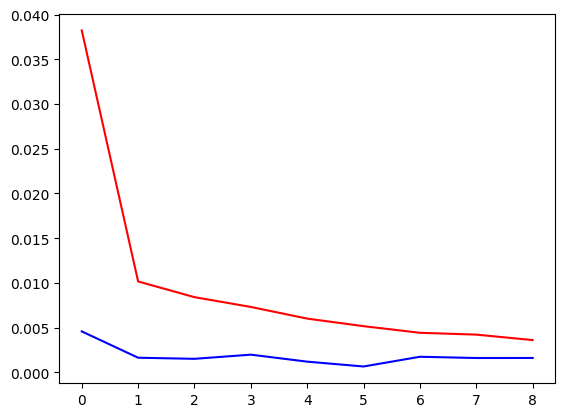

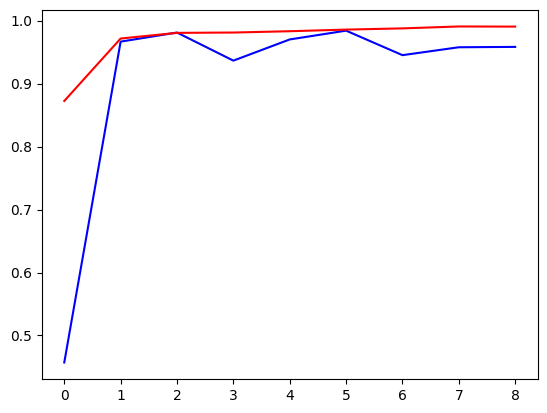

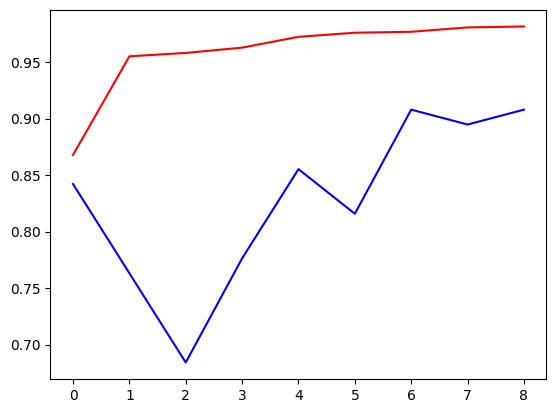

In [ ]:
fig = plt.figure()
plt.plot(history2.history['loss'],'r')
plt.plot(history2.history['val_loss'],'b')
plt.show()
plt.plot(history2.history['val_precision'],'b')
plt.plot(history2.history['precision'],'r')
plt.show()
plt.plot(history2.history['val_recall'],'b')
plt.plot(history2.history['recall'],'r')

plt.show()

In [ ]:
y_pred2=model2.predict(X_test2)

625/625 [==============================] - 3s 6ms/step


In [ ]:
y_target = data['encoded_target'].values
y_prueba = y_target[120000:140000]

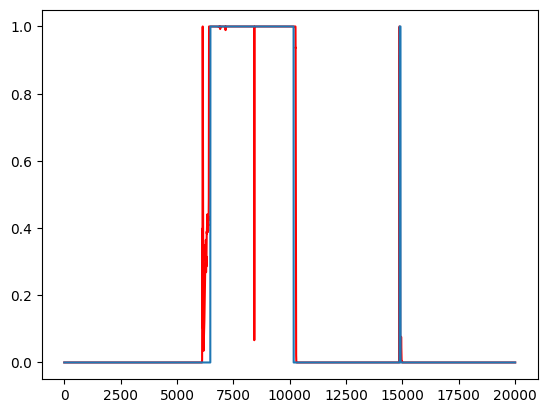

In [ ]:
plt.plot(y_pred2,'r')
plt.plot(y_prueba)

In [ ]:
y_pred_val2=model2.predict(X_val2)

2308/2308 [==============================] - 10s 4ms/step


Tercer Modelo


In [ ]:
X3 = []
y3 = []

n_future = 1
n_past = 60

for i in range(n_past,len(df_scaled)-n_future+1):
  X3.append(df_scaled[i-n_past:i,1:df_train.shape[1]+1])
  y3.append(df_scaled[i+n_future-1:i+n_future,0])

X3, y3 = np.array(X3),np.array(y3)

In [ ]:
X_train3=X3[0:120000]
y_train3=y3[0:120000]

X_val3=X3[140000::]
y_val3=y3[140000::]

X_test3=X3[120000:140000]
y_test3=y3[120000:140000]

In [ ]:
model3 = Sequential()
model3.add(LSTM(12,activation='relu',input_shape=(X_train3.shape[1],X_train3.shape[2]),return_sequences=True))
model3.add(LSTM(12,activation='relu',return_sequences=True))
model3.add(Dropout(0.5))
model3.add(LSTM(6,activation='relu',return_sequences=True))
model3.add(LSTM(6,activation='relu',return_sequences=True))
model3.add(LSTM(3,activation='relu',return_sequences=False))
model3.add(Dropout(0.1))
model3.add(Dense(1,activation='sigmoid'))
model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['Precision', 'Recall'])

print(model3.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_39 (LSTM)              (None, 60, 12)            1296      
                                                                 
 lstm_40 (LSTM)              (None, 60, 12)            1200      
                                                                 
 dropout_12 (Dropout)        (None, 60, 12)            0         
                                                                 
 lstm_41 (LSTM)              (None, 60, 6)             456       
                                                                 
 lstm_42 (LSTM)              (None, 60, 6)             312       
                                                                 
 lstm_43 (LSTM)              (None, 3)                 120       
                                                                 
 dropout_13 (Dropout)        (None, 3)                

In [ ]:
history3 = model3.fit(X_train3,y_train3,epochs=25,batch_size=128,validation_data=(X_val3,y_val3),callbacks=[early_stopping_callback, model_checkpoint_callback])

Epoch 1/55
938/938 [==============================] - 84s 79ms/step - loss: 0.4974 - precision: 0.7604 - recall: 0.8174 - val_loss: 0.3679 - val_precision: 0.6418 - val_recall: 0.5658
Epoch 2/55
938/938 [==============================] - 82s 87ms/step - loss: 0.2642 - precision: 0.9816 - recall: 0.9317 - val_loss: 0.2598 - val_precision: 0.5568 - val_recall: 0.6447
Epoch 3/55
938/938 [==============================] - 76s 81ms/step - loss: 0.1546 - precision: 0.9874 - recall: 0.9323 - val_loss: 0.1366 - val_precision: 0.5833 - val_recall: 0.6447
Epoch 4/55
938/938 [==============================] - 72s 77ms/step - loss: 0.0990 - precision: 0.9917 - recall: 0.9121 - val_loss: 0.0938 - val_precision: 0.6533 - val_recall: 0.6447
Epoch 5/55
938/938 [==============================] - 81s 86ms/step - loss: 0.0624 - precision: 0.9947 - recall: 0.9557 - val_loss: 0.2261 - val_precision: 0.5800 - val_recall: 0.7632
Epoch 6/55
938/938 [==============================] - 71s 75ms/step - loss: 0.05

In [ ]:
model3.save('/content/drive/MyDrive/IA/model3.keras')

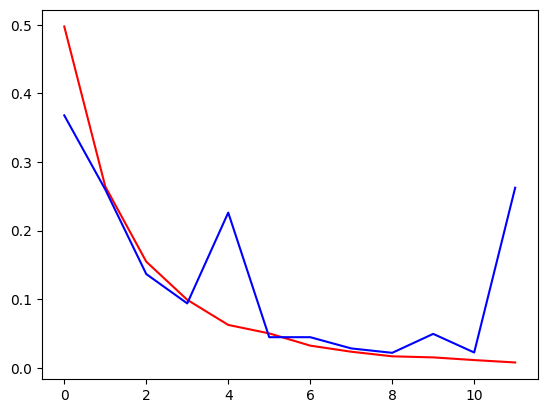

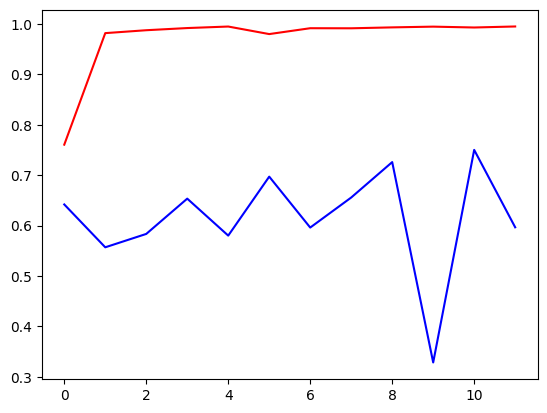

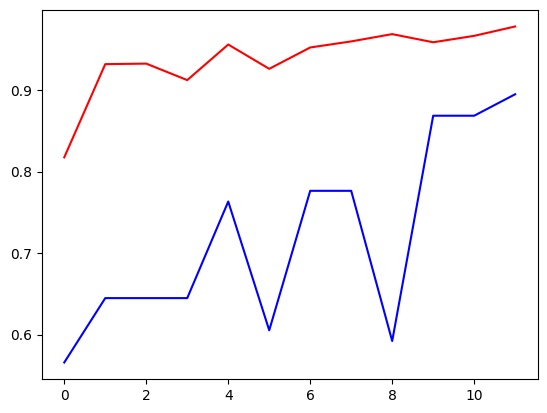

In [ ]:
fig = plt.figure()
plt.plot(history3.history['loss'],'r')
plt.plot(history3.history['val_loss'],'b')

plt.show()
plt.plot(history3.history['precision'],'r')
plt.plot(history3.history['val_precision'],'b')
plt.show()
plt.plot(history3.history['recall'],'r')
plt.plot(history3.history['val_recall'],'b')
plt.show()

In [ ]:
y_pred3=model3.predict(X_test3)


625/625 [==============================] - 10s 14ms/step


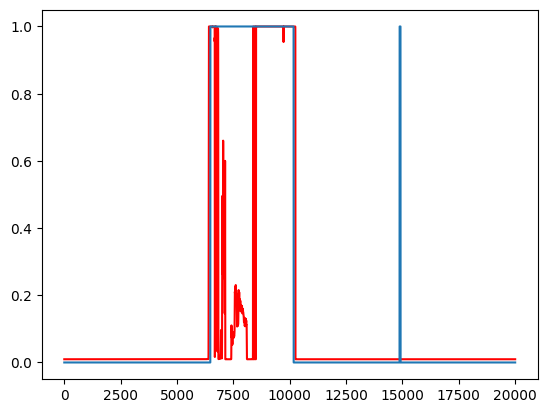

In [ ]:
plt.plot(y_pred3,'r')
plt.plot(y_prueba)

In [ ]:
model_checkpoint_path = '/content/drive/MyDrive/IA/model2_checkpoint.h5'

early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True )

model_checkpoint_callback = ModelCheckpoint(
    model_checkpoint_path,
    monitor='val_loss',
    save_best_only=True,
    mode='min')

Cuarto Modelo

In [ ]:
X4 = []
y4 = []

n_future = 30
n_past = 30

for i in range(n_past,len(df_scaled)-n_future+1):
  X4.append(df_scaled[i-n_past:i,1:df_train.shape[1]+1])
  y4.append(df_scaled[i+n_future-1:i+n_future,0])

X4, y4 = np.array(X4),np.array(y4)

In [ ]:
X_train4=X4[0:120000]
y_train4=y4[0:120000]

X_val4=X4[140000::]
y_val4=y4[140000::]

X_test4=X4[120000:140000]
y_test4=y4[120000:140000]

In [ ]:
model4 = Sequential()
model4.add(LSTM(12,activation='relu',input_shape=(X_train4.shape[1],X_train4.shape[2]),return_sequences=True))
model4.add(LSTM(12,activation='relu',return_sequences=True))
model4.add(LSTM(6,activation='relu',return_sequences=True))
model4.add(LSTM(6,activation='relu',return_sequences=True))
model4.add(LSTM(3,activation='relu',return_sequences=False))
model4.add(Dropout(0.1))
model4.add(Dense(1,activation='sigmoid'))
model4.compile(optimizer='adam',loss='binary_crossentropy',metrics=['Precision', 'Recall'])

print(model4.summary())

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_64 (LSTM)              (None, 30, 12)            1296      
                                                                 
 lstm_65 (LSTM)              (None, 30, 12)            1200      
                                                                 
 lstm_66 (LSTM)              (None, 30, 6)             456       
                                                                 
 lstm_67 (LSTM)              (None, 30, 6)             312       
                                                                 
 lstm_68 (LSTM)              (None, 3)                 120       
                                                                 
 dropout_20 (Dropout)        (None, 3)                 0         
                                                                 
 dense_11 (Dense)            (None, 1)               

In [ ]:
model_checkpoint_path = '/content/drive/MyDrive/IA/model4_checkpoint.h5'
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True )

model_checkpoint_callback = ModelCheckpoint(
    model_checkpoint_path,
    monitor='val_loss',
    save_best_only=True,
    mode='min')

In [ ]:
history4 = model4.fit(X_train4,y_train4,epochs=25,batch_size=128,validation_data=(X_val4,y_val4),callbacks=[early_stopping_callback, model_checkpoint_callback],shuffle=True)

Epoch 1/25
938/938 [==============================] - 100s 95ms/step - loss: 0.1569 - precision: 0.8661 - recall: 0.7961 - val_loss: 0.0972 - val_precision: 0.2929 - val_recall: 0.3816
Epoch 2/25
  1/938 [..............................] - ETA: 59s - loss: 0.0421 - precision: 1.0000 - recall: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


938/938 [==============================] - 83s 88ms/step - loss: 0.0675 - precision: 0.9522 - recall: 0.8395 - val_loss: 0.0362 - val_precision: 0.3176 - val_recall: 0.3553
Epoch 3/25
938/938 [==============================] - 80s 86ms/step - loss: 0.0544 - precision: 0.9660 - recall: 0.8523 - val_loss: 0.0878 - val_precision: 0.3535 - val_recall: 0.4605
Epoch 4/25
938/938 [==============================] - 70s 74ms/step - loss: 0.0444 - precision: 0.9640 - recall: 0.8544 - val_loss: 0.0317 - val_precision: 0.4091 - val_recall: 0.4737
Epoch 5/25
938/938 [==============================] - 74s 79ms/step - loss: 0.0357 - precision: 0.9727 - recall: 0.8657 - val_loss: 0.0732 - val_precision: 0.4070 - val_recall: 0.4605
Epoch 6/25
938/938 [==============================] - 81s 86ms/step - loss: 0.0313 - precision: 0.9739 - recall: 0.8642 - val_loss: 0.1058 - val_precision: 0.4421 - val_recall: 0.5526
Epoch 7/25
938/938 [==============================] - 70s 74ms/step - loss: 0.0283 - precis

In [ ]:
model4.save('/content/drive/MyDrive/IA/model4.keras')

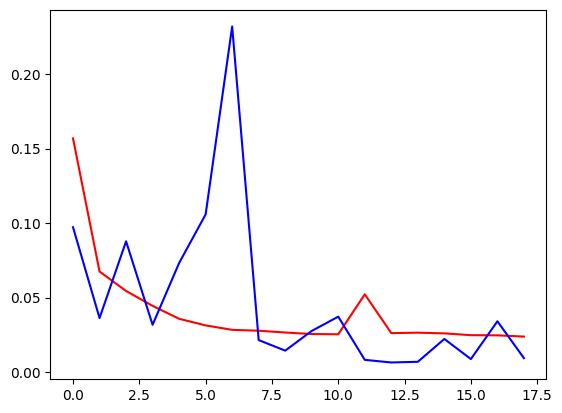

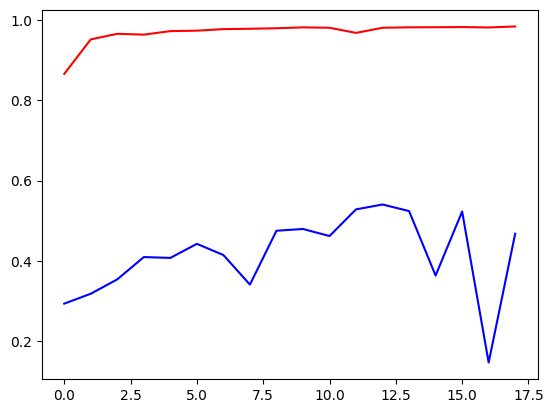

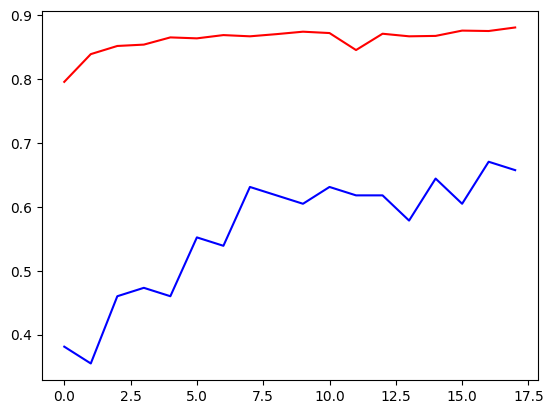

In [ ]:
fig = plt.figure()
plt.plot(history4.history['loss'],'r')
plt.plot(history4.history['val_loss'],'b')

plt.show()
plt.plot(history4.history['precision'],'r')
plt.plot(history4.history['val_precision'],'b')
plt.show()
plt.plot(history4.history['recall'],'r')
plt.plot(history4.history['val_recall'],'b')
plt.show()

In [ ]:
y_pred4=model4.predict(X_test4)

625/625 [==============================] - 10s 15ms/step


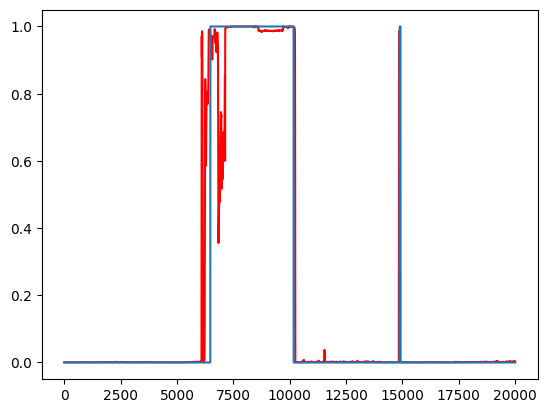

In [ ]:
plt.plot(y_pred4,'r')
plt.plot(y_prueba)

In [ ]:
X5 = []
y5 = []

n_future = 1
n_past = 10

for i in range(n_past,len(df_scaled)-n_future+1):
  X5.append(df_scaled[i-n_past:i,1:df_train.shape[1]+1])
  y5.append(df_scaled[i+n_future-1:i+n_future,0])

X5, y5 = np.array(X5),np.array(y5)

In [ ]:
X_train5=X5[0:120000]
y_train5=y5[0:120000]

X_val5=X5[140000::]
y_val5=y5[140000::]

X_test5=X5[120000:140000]
y_test5=y5[120000:140000]

In [ ]:
model5 = Sequential()
model5.add(LSTM(12,activation='relu',input_shape=(X_train5.shape[1],X_train5.shape[2]),return_sequences=True))
model5.add(LSTM(12,activation='relu',return_sequences=True))
model5.add(Dropout(0.5))
model5.add(LSTM(6,activation='relu',return_sequences=True))
model5.add(LSTM(6,activation='relu',return_sequences=True))
model5.add(Dropout(0.5))
model5.add(LSTM(3,activation='relu',return_sequences=False))
model5.add(Dropout(0.5))
model5.add(Dense(1,activation='sigmoid'))
model5.compile(optimizer='adam',loss='binary_crossentropy',metrics=['Precision', 'Recall'])
print(model5.summary())

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_79 (LSTM)              (None, 10, 12)            1296      
                                                                 
 lstm_80 (LSTM)              (None, 10, 12)            1200      
                                                                 
 dropout_26 (Dropout)        (None, 10, 12)            0         
                                                                 
 lstm_81 (LSTM)              (None, 10, 6)             456       
                                                                 
 lstm_82 (LSTM)              (None, 10, 6)             312       
                                                                 
 dropout_27 (Dropout)        (None, 10, 6)             0         
                                                                 
 lstm_83 (LSTM)              (None, 3)               

In [ ]:
model_checkpoint_path = '/content/drive/MyDrive/IA/model5_checkpoint.h5'
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True )

model_checkpoint_callback = ModelCheckpoint(
    model_checkpoint_path,
    monitor='val_loss',
    save_best_only=True,
    mode='min')

In [ ]:
history5 = model5.fit(X_train5,y_train5,epochs=25,batch_size=64,validation_data=(X_val5,y_val5),callbacks=[early_stopping_callback, model_checkpoint_callback])

Epoch 1/25
1875/1875 [==============================] - 51s 24ms/step - loss: 0.2084 - precision: 0.0833 - recall: 2.1286e-04 - val_loss: 0.0049 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/25
1875/1875 [==============================] - 48s 26ms/step - loss: 0.1076 - precision: 0.9157 - recall: 0.2567 - val_loss: 0.0022 - val_precision: 0.9787 - val_recall: 0.6053
Epoch 3/25
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0776 - precision: 0.9687 - recall: 0.4683 - val_loss: 0.0145 - val_precision: 0.9286 - val_recall: 0.8553
Epoch 4/25
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0750 - precision: 0.9817 - recall: 0.4693 - val_loss: 0.0118 - val_precision: 0.9559 - val_recall: 0.8553
Epoch 5/25
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0755 - precision: 0.9838 - recall: 0.4655 - val_loss: 0.0010 - val_precision: 0.9559 - val_recall: 0.8553
Epoch 6/25
1875/1875 [==============================] - 44

In [ ]:
model5.save('/content/drive/MyDrive/IA/model5.keras')

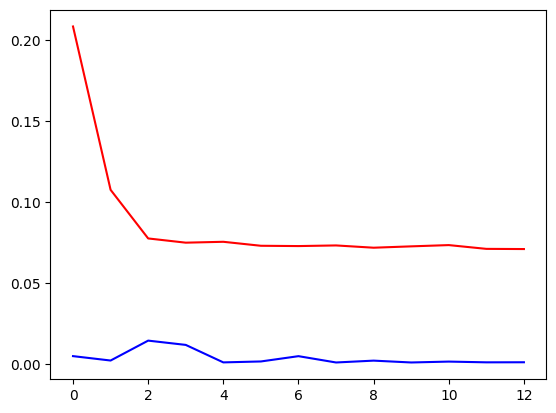

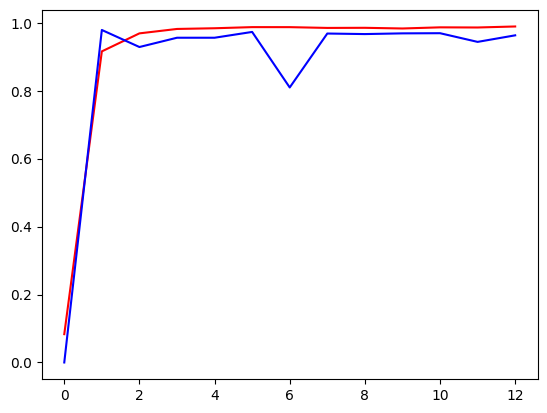

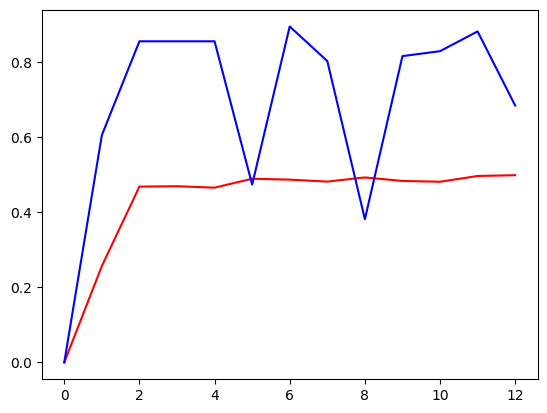

In [ ]:
fig = plt.figure()
plt.plot(history5.history['loss'],'r')
plt.plot(history5.history['val_loss'],'b')

plt.show()
plt.plot(history5.history['precision'],'r')
plt.plot(history5.history['val_precision'],'b')
plt.show()
plt.plot(history5.history['recall'],'r')
plt.plot(history5.history['val_recall'],'b')
plt.show()

In [ ]:
y_pred5=model5.predict(X_test5)

625/625 [==============================] - 4s 6ms/step


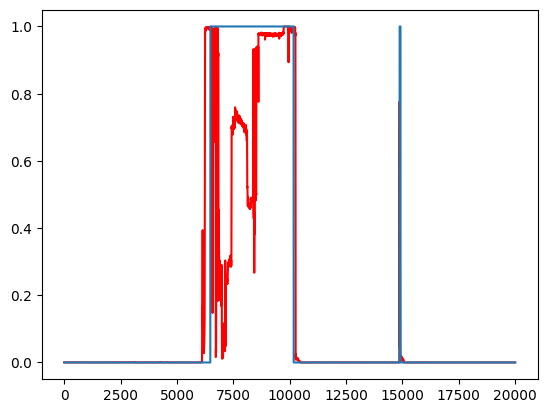

In [ ]:
plt.plot(y_pred5,'r')
plt.plot(y_prueba)